# Importing library

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

**Data Overview**

**Data reading and preview**

In [8]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**shape of the data**

In [9]:
data.shape

(1599, 12)

**data columns**

In [10]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**statistical summary of numerical column**

In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Data Info**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


  **Data cleaning**

In [13]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Duplicate check**

In [14]:
print('counting duplicates')
updated_data = len(data) - len(data.drop_duplicates())
updated_data

counting duplicates


240

In [15]:
updated_data = data.drop_duplicates()

In [16]:
updated_data.shape

(1359, 12)

**Data Analysis (EDA)**

#### number of values for each quality

In [17]:
updated_data.groupby(['quality'])['quality'].count()

quality
3     10
4     53
5    577
6    535
7    167
8     17
Name: quality, dtype: int64

###### if the quality of the wine is low then the wine is bad otherwise if the quality of the wine is high then the wine is good

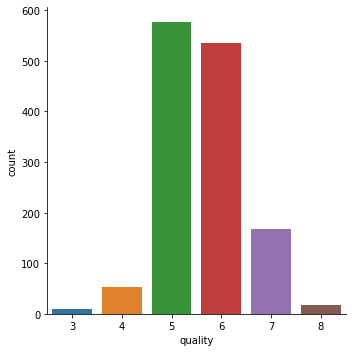

In [18]:
sns.catplot(x='quality', data=updated_data, kind='count')

 **Comparing other columns with quality to see which one is directly related or inversely proportional to quality 
 [** Note:**]
 as the volatile acidity increases, the quality of the wine decreases, as the volatile acidity decreases, the quality of the wine increases (therefore they are inversely propotional)**

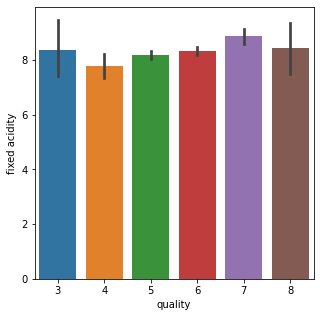

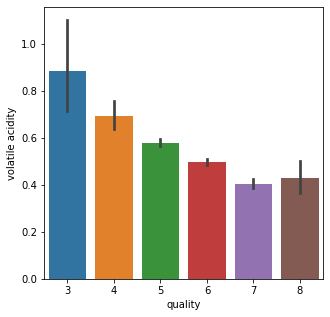

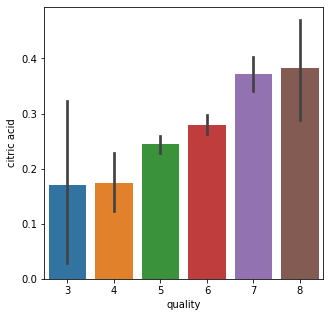

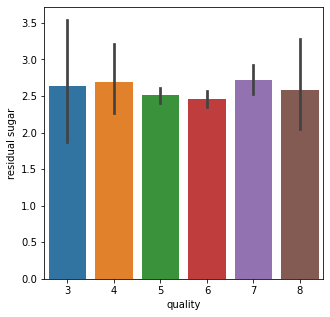

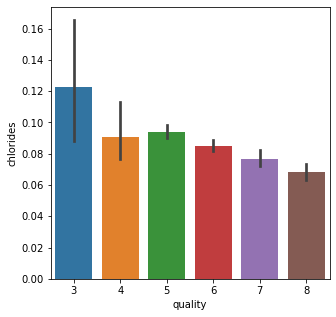

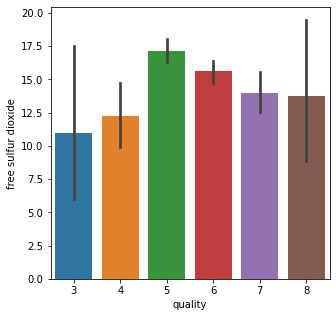

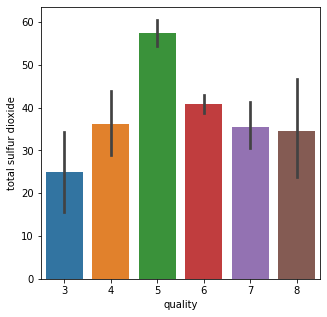

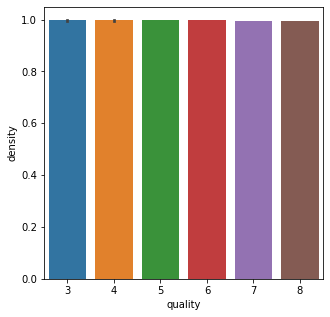

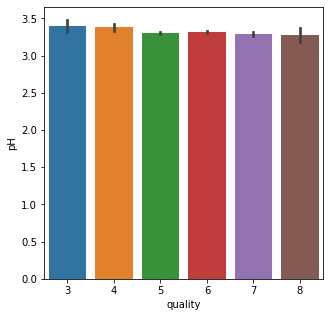

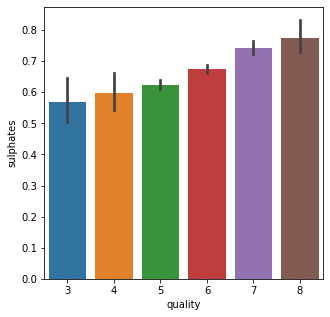

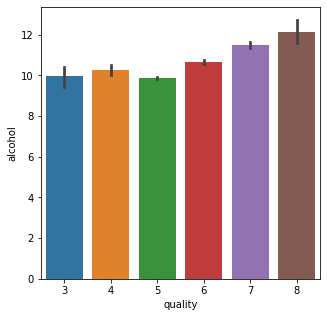

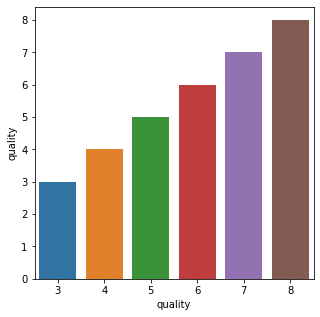

In [19]:
columns = updated_data.columns
for col in columns:
    plot = plt.figure(figsize=(5,5))
    sns.barplot(x='quality', y=col, data=updated_data)

**correlation**

1. positive correlation 
2. Negative correlation 

In [20]:
corr = updated_data.corr()

**constructing a heatmap to understand the correlation between the columns**

<AxesSubplot:>

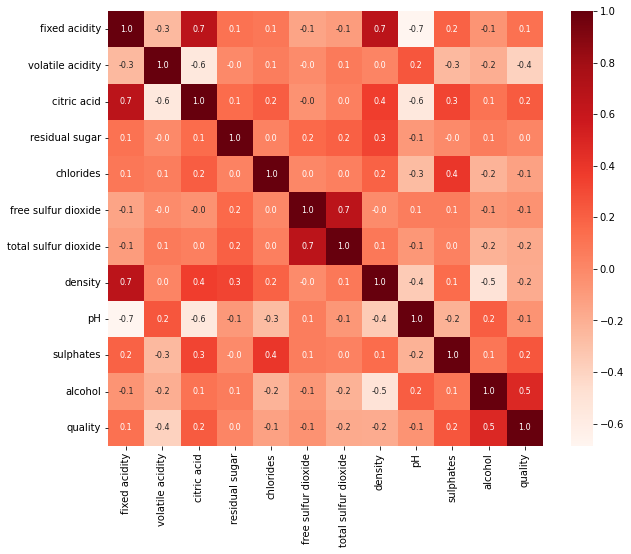

In [21]:
plot = plt.figure(figsize=(10,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

**Data Preprocessing**

In [22]:
x = updated_data.drop(['quality'], axis=1)
y = updated_data['quality']

In [23]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


**Note: Looking at the quality column, we have 3 to 8. it is advisable to binaries it into 0 or 1. that is putting it into binary 0's and 1's**

**Label Binarization**

In [24]:
y = updated_data['quality'].apply(lambda y_value: 1 if y_value >=6 else 0)
y

0       0
1       0
2       0
3       1
5       0
       ..
1593    1
1594    0
1595    1
1597    0
1598    1
Name: quality, Length: 1359, dtype: int64

**Train and Test data**

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

**Model Building**

**RandomForestClassifier**

In [26]:
model = RandomForestClassifier()

In [27]:
model.fit(x_train,y_train)

RandomForestClassifier()

**Model Evauation**

**Accuracy score**

In [28]:
x_train_prediction =  model.predict(x_train)
trained_accuracy_score = accuracy_score(x_train_prediction, y_train)
print('Accuracy score:',trained_accuracy_score)

Accuracy score: 1.0


In [29]:
x_test_prediction =  model.predict(x_test)
test_accuracy_score = accuracy_score(x_test_prediction, y_test)
print('Accuracy score:',test_accuracy_score)

Accuracy score: 0.7610294117647058


**KNeighbors Classifier**

In [30]:
KN = KNeighborsClassifier(algorithm='ball_tree',n_jobs=1,n_neighbors= 200,weights='distance')


In [31]:
KN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=1, n_neighbors=200,
                     weights='distance')

In [34]:
KN.score(x_test,y_test)

0.6397058823529411

**Building a predictive system**

In [147]:
input_data = (7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8)

input_data_asarray = np.asarray(input_data)

data_reshape = input_data_asarray.reshape(1,-1)

prediction = model.predict(data_reshape)

print(prediction)

if (prediction == 0):
    print('The wine is not quality enough')
else:
    print('The wine has good quality')

[0]
The wine is not quality enough
